In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as ws
ws.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print ("hello world get started")

hello world get started


In [1]:
print("i am back")

i am back


In [5]:
df = pd.read_csv("./Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
def clean_name(name):
  return name.strip().lower()

In [11]:
df.rename(columns=clean_name, inplace = True)

In [12]:
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


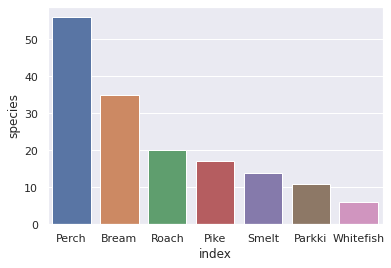

In [17]:
sns.set()
sns.barplot(x="index", y ="species", data = df.species.value_counts().reset_index())
plt.show()

In [18]:
df.isna().sum()

species    0
weight     0
length1    0
length2    0
length3    0
height     0
width      0
dtype: int64

In [38]:
# Adding the lable encoder to lables 
from sklearn.preprocessing import LabelEncoder
catagory = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
la_encode = LabelEncoder()
encoded_species = la_encode.fit_transform(df.species)
df.species = encoded_species

In [39]:
df.species.unique()

array([0, 4, 6, 1, 2, 3, 5])

In [40]:
X = df.drop(columns="species")
y = df["species"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, stratify = y)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 6)
(32, 6)
(127,)
(32,)


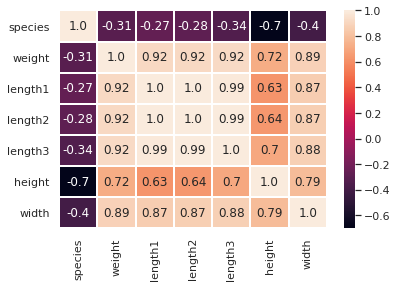

In [67]:
sns.heatmap(df.corr(), annot = True, linewidths="1", fmt = '.2')

In [44]:
# Fitting the logistic regression
from sklearn.linear_model import LogisticRegression

In [46]:
logit = LogisticRegression(multi_class= "ovr")
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = logit.predict(X_test)

In [53]:
print("Logistic Regression trainig score is ", logit.score(X_train, y_train))
print("The testing score is ",  logit.score(X_test, y_test))

Logistic Regression trainig score is  0.9448818897637795
The testing score is  0.96875


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.85      0.86      0.85        32
weighted avg       0.94      0.97      0.95        32



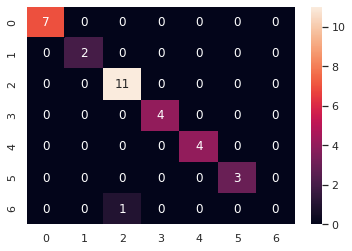

In [64]:
sns.set()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [60]:
# using cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(logit, X_train, y_train, cv = 5)
print(score)

[0.88461538 0.88461538 0.96       0.96       0.96      ]
